In [4]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import os
import re
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict
import tensorflow as tf

Matplotlib is building the font cache; this may take a moment.


# Loading Data

In [5]:
columns = ["image_id", "caption", "comparison", "indication", "findings", "impression","height","width"]
df = pd.DataFrame(columns = columns)

In [6]:
len(os.listdir("/Users/payaldabas/Downloads/NLMCXR_png"))

7471

# Extracting data from XML files

In [9]:
from tqdm import tqdm
for file in tqdm(os.listdir("/Users/payaldabas/Downloads/NLMCXR_reports/ecgen-radiology/")):
    if file.endswith(".xml"):
        k = "/Users/payaldabas/Downloads/NLMCXR_reports/ecgen-radiology/"
        path = k + file
        mytree = ET.parse(path)# parsing xml report
        comparision = mytree.find(".//AbstractText[@Label='COMPARISON']").text # extracting comaparison text
        indication = mytree.find(".//AbstractText[@Label='INDICATION']").text #extracting indication text
        findings = mytree.find(".//AbstractText[@Label='FINDINGS']").text # extracting findings text
        impression = mytree.find(".//AbstractText[@Label='IMPRESSION']").text  # extracting impression text

        mytree = ET.parse(path)
        for x in mytree.findall("parentImage"):
            image_id = x.attrib['id']+".png"
            filename = '/Users/payaldabas/Downloads/NLMCXR_png/' + image_id
            image = cv2.imread(filename) # reading image

            height, width, channels = image.shape
            caption = '' if x.find('caption').text is None else x.find('caption').text

            df = pd.concat([df, pd.DataFrame([[image_id, caption, comparision, indication, findings, impression, height, width]],
                                  columns=columns)], ignore_index=True)












































































































































































































































100%|██████████| 3955/3955 [00:25<00:00, 155.34it/s]


In [10]:
df.shape

(7470, 8)

In [11]:
df

,image_id,caption,comparison,indication,findings,impression,height,width
0,CXR162_IM-0401-1001.png,PA and lateral chest.,None.,XXXX.,Heart size normal. Lungs are clear. XXXX are n...,Normal chest,420,512
1,CXR162_IM-0401-2001.png,PA and lateral chest.,None.,XXXX.,Heart size normal. Lungs are clear. XXXX are n...,Normal chest,624,512
2,CXR1390_IM-0249-1001.png,PA and lateral chest x-XXXX XXXX,None,"Slipped , XXXX back on right side",The heart size and pulmonary vascularity appea...,No evidence of active disease.,512,512
3,CXR1390_IM-0249-2001.png,PA and lateral chest x-XXXX XXXX,None,"Slipped , XXXX back on right side",The heart size and pulmonary vascularity appea...,No evidence of active disease.,512,512
4,CXR604_IM-2193-1001.png,PA and Lateral Chest X-XXXX dated XXXX.,XXXX.,Bone marrow transplant evaluation. AML.,The heart size and pulmonary vascularity appea...,1. No evidence of active disease.,512,512
...,...,...,...,...,...,...,...,...
7465,CXR85_IM-2372-1001.png,Xray Chest PA and Lateral,None,Status post cardiac catheterization.,There are scattered calcified granulomas. No f...,No evidence of active disease.,511,512
7466,CXR85_IM-2372-2001.png,Xray Chest PA and Lateral,None,Status post cardiac catheterization.,There are scattered calcified granulomas. No f...,No evidence of active disease.,511,512
7467,CXR1389_IM-0247-1001.png,"PA and lateral chest 3 images XXXX, XXXX at XX...",None,History of chest pain XXXX nausea.,None,Heart size is normal. Lungs are clear. Overexp...,624,512
7468,CXR1389_IM-0247-2001.png,"PA and lateral chest 3 images XXXX, XXXX at XX...",None,History of chest pain XXXX nausea.,None,Heart size is normal. Lungs are clear. Overexp...,624,512


In [12]:
df[df['image_id']=='CXR1_1_IM-0001-3001.png']

,image_id,caption,comparison,indication,findings,impression,height,width
7026,CXR1_1_IM-0001-3001.png,Xray Chest PA and Lateral,None.,Positive TB test,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,624,512


In [13]:
df.shape

(7470, 8)

In [14]:
def absolute_path(x):
    '''Makes the path absolute '''
    x = '/Users/payaldabas/Downloads/NLMCXR_png/'+ x
    return x
    
df['Image_path'] = df['image_id'].apply(lambda x : absolute_path(x)) # making the paths absolute

In [15]:
df.head(5)

,image_id,caption,comparison,indication,findings,impression,height,width,Image_path
0,CXR162_IM-0401-1001.png,PA and lateral chest.,None.,XXXX.,Heart size normal. Lungs are clear. XXXX are n...,Normal chest,420,512,/Users/payaldabas/Downloads/NLMCXR_png/CXR162_...
1,CXR162_IM-0401-2001.png,PA and lateral chest.,None.,XXXX.,Heart size normal. Lungs are clear. XXXX are n...,Normal chest,624,512,/Users/payaldabas/Downloads/NLMCXR_png/CXR162_...
2,CXR1390_IM-0249-1001.png,PA and lateral chest x-XXXX XXXX,None,"Slipped , XXXX back on right side",The heart size and pulmonary vascularity appea...,No evidence of active disease.,512,512,/Users/payaldabas/Downloads/NLMCXR_png/CXR1390...
3,CXR1390_IM-0249-2001.png,PA and lateral chest x-XXXX XXXX,None,"Slipped , XXXX back on right side",The heart size and pulmonary vascularity appea...,No evidence of active disease.,512,512,/Users/payaldabas/Downloads/NLMCXR_png/CXR1390...
4,CXR604_IM-2193-1001.png,PA and Lateral Chest X-XXXX dated XXXX.,XXXX.,Bone marrow transplant evaluation. AML.,The heart size and pulmonary vascularity appea...,1. No evidence of active disease.,512,512,/Users/payaldabas/Downloads/NLMCXR_png/CXR604_...


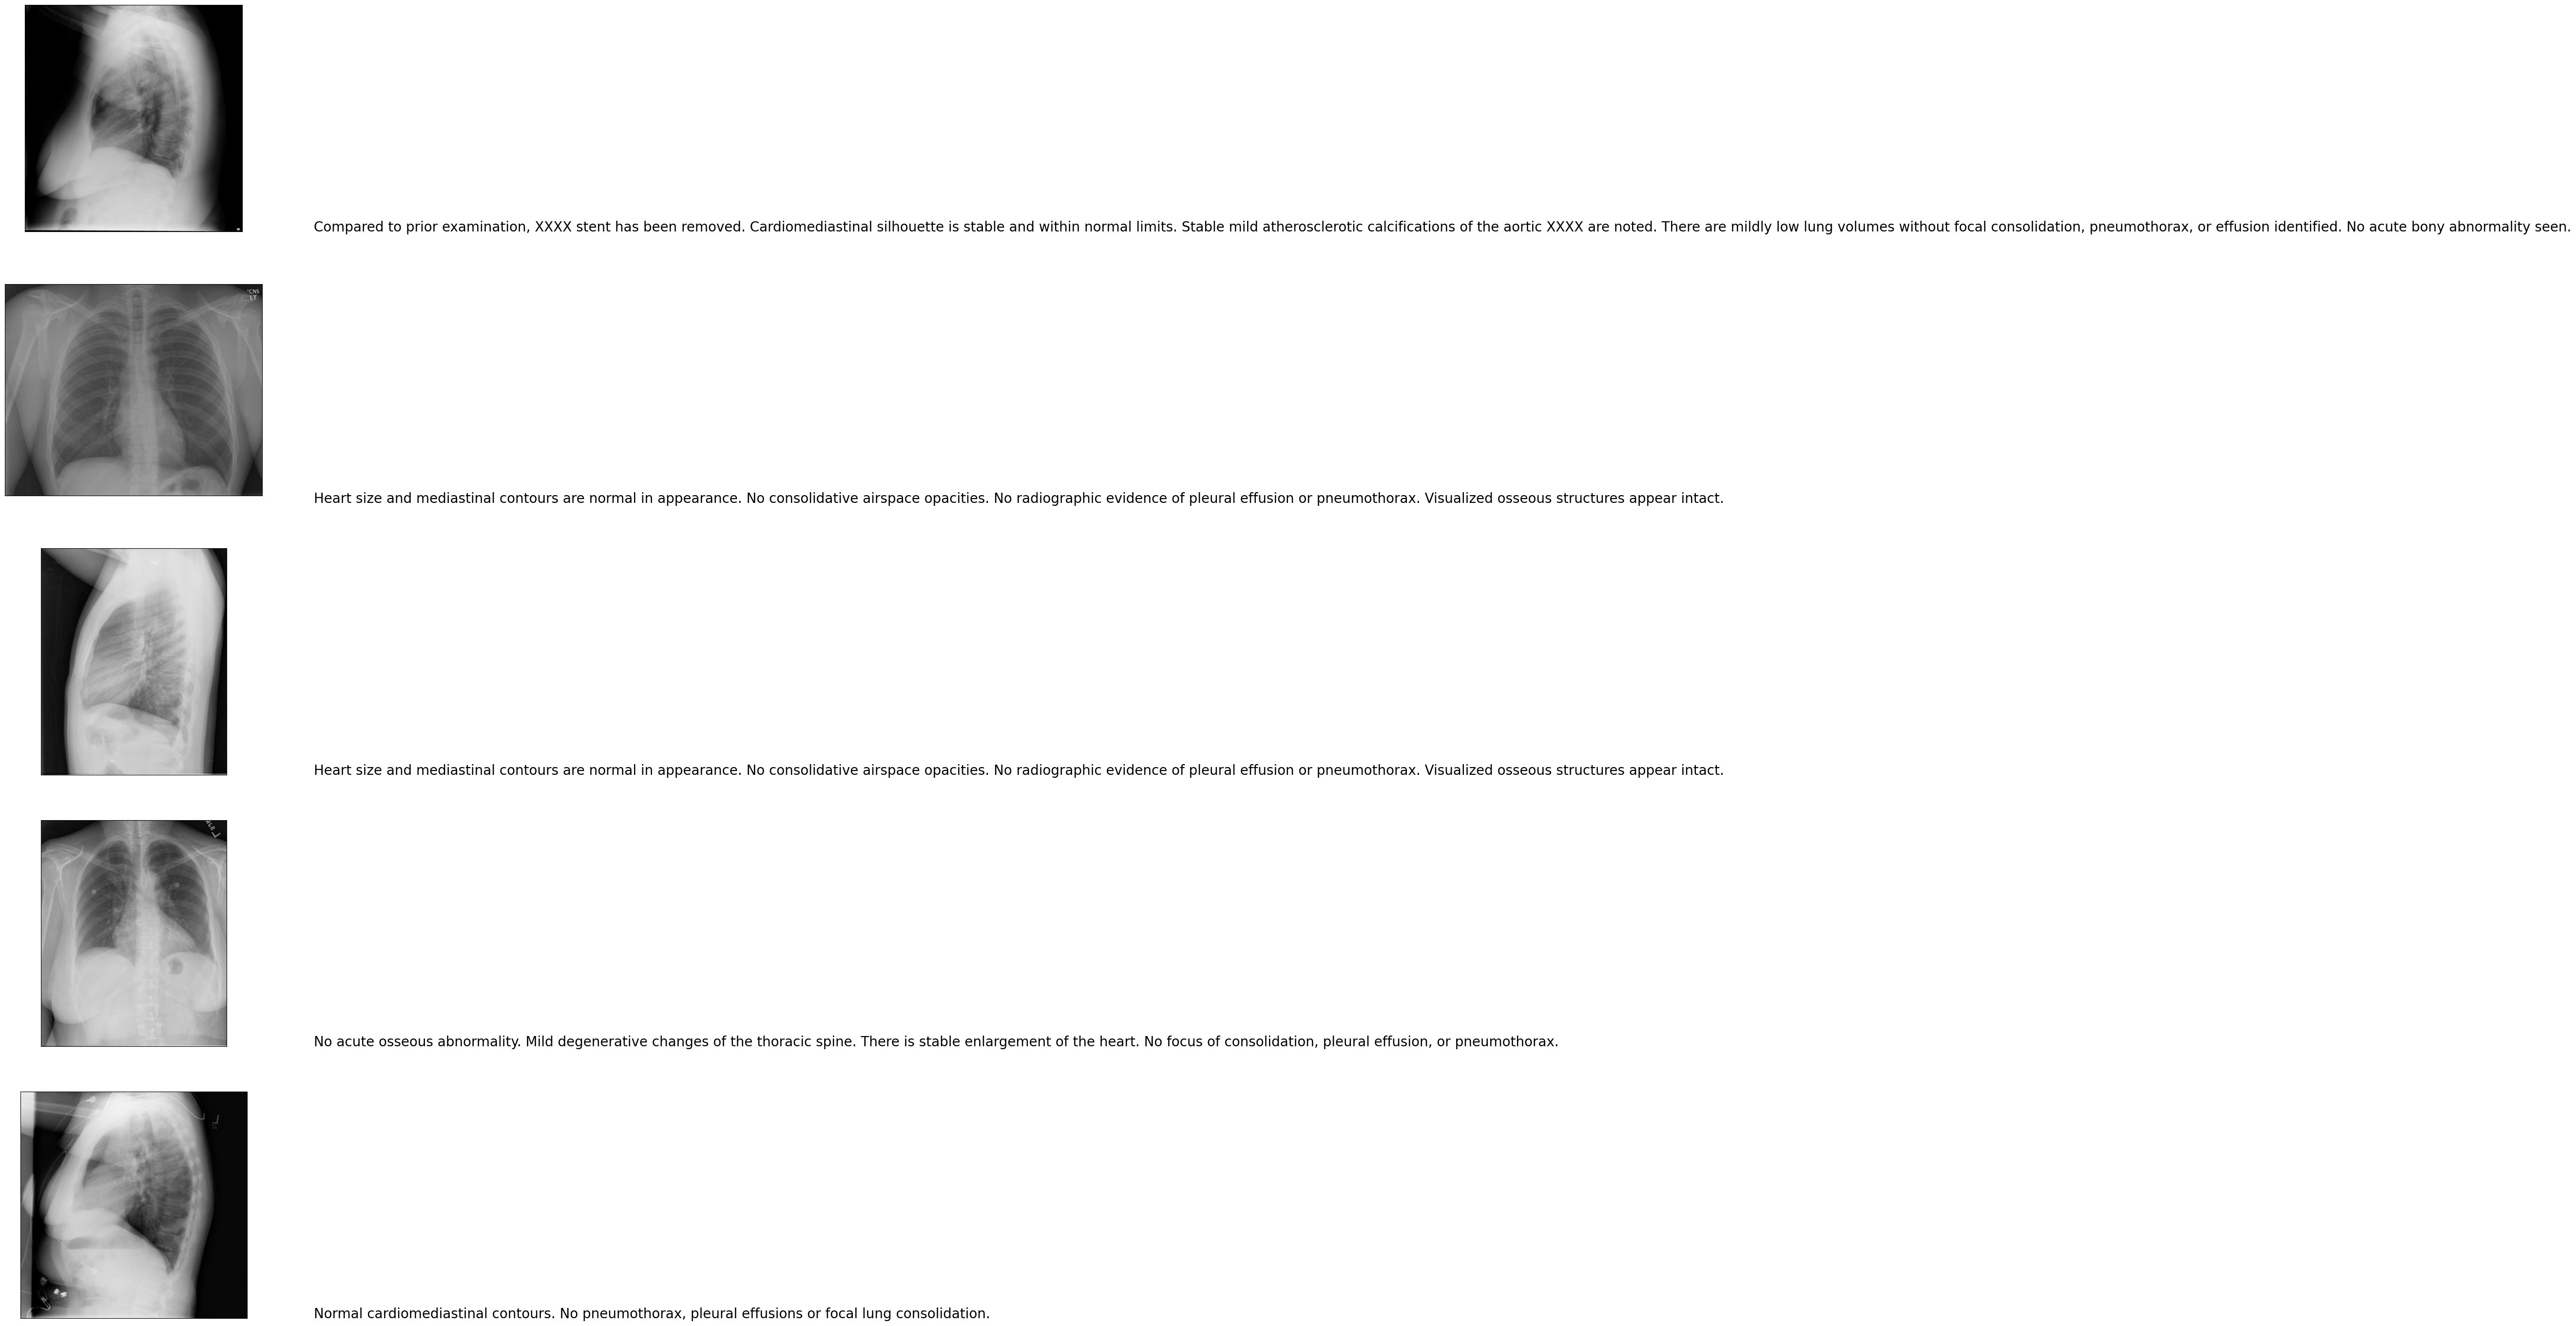

In [16]:
count = 1  
fig = plt.figure(figsize=(15,35))

for filename in df['Image_path'].values[95:100]:
    findings = list(df["findings"].loc[df["Image_path"] == filename].values)
    img = cv2.imread(filename)    
    ax = fig.add_subplot(5, 2 , count , xticks=[], yticks=[])  
    ax.imshow(img)
    count += 1
    ax = fig.add_subplot(5 ,2 ,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0, len(findings))
    for i, f in enumerate(findings):
        ax.text(0,i,f,fontsize=20)
    count += 1 
plt.show()

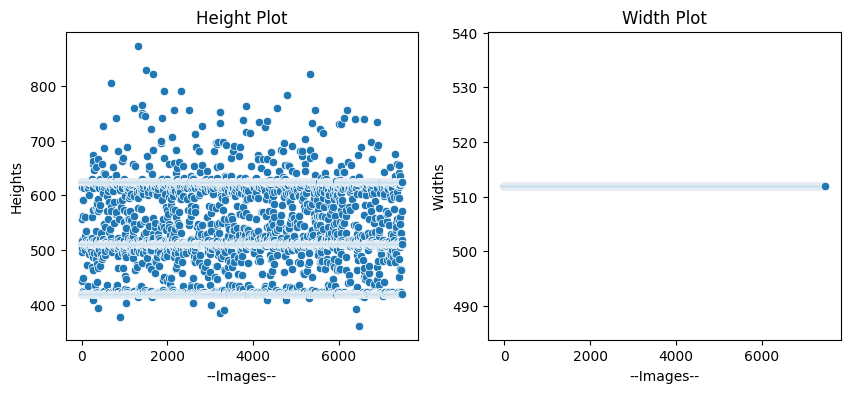

In [17]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title('Height Plot')
plt.ylabel('Heights')
plt.xlabel('--Images--')
sns.scatterplot(x=range(len(df.height.values)), y=df.height.values)

plt.subplot(122)
plt.title('Width Plot')
plt.ylabel('Widths')
plt.xlabel('--Images--')
sns.scatterplot(x=range(len(df.width.values)), y=df.width.values)

plt.show()

In [18]:
# number of missing values
df.isnull().sum()

image_id         0
caption          0
comparison    1157
indication     159
findings       997
impression      52
height           0
width            0
Image_path       0
dtype: int64

In [19]:
data = df[['image_id','findings','height','width','Image_path']]

In [20]:
data.shape

(7470, 5)

In [21]:
data.isnull().sum()

image_id        0
findings      997
height          0
width           0
Image_path      0
dtype: int64

In [22]:
data = data.dropna(axis=0) # drop all missing value rows

In [23]:
data.shape

(6473, 5)

In [24]:
data.isnull().sum()

image_id      0
findings      0
height        0
width         0
Image_path    0
dtype: int64

'The heart size and pulmonary vascularity appear within normal limits. The lungs are free of focal airspace disease. No pleural effusion or pneumothorax is seen. PICC line is in XXXX. The tip is in the upper right atrium.'

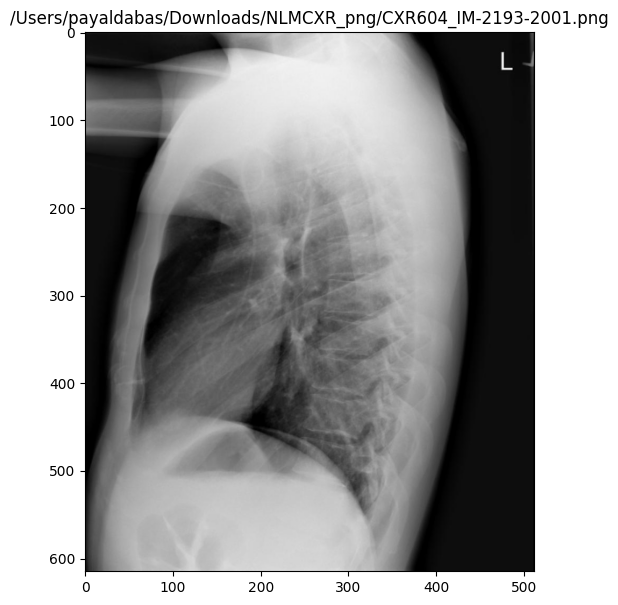

In [25]:
plt.figure(figsize=(8,7))
img = cv2.imread(data['Image_path'].values[5])
plt.imshow(img)
plt.title(data['Image_path'].values[5])

data['findings'].values[5]

In [26]:
data.Image_path

0       /Users/payaldabas/Downloads/NLMCXR_png/CXR162_...
1       /Users/payaldabas/Downloads/NLMCXR_png/CXR162_...
2       /Users/payaldabas/Downloads/NLMCXR_png/CXR1390...
3       /Users/payaldabas/Downloads/NLMCXR_png/CXR1390...
4       /Users/payaldabas/Downloads/NLMCXR_png/CXR604_...
                              ...                        
7462    /Users/payaldabas/Downloads/NLMCXR_png/CXR2680...
7463    /Users/payaldabas/Downloads/NLMCXR_png/CXR2680...
7464    /Users/payaldabas/Downloads/NLMCXR_png/CXR2680...
7465    /Users/payaldabas/Downloads/NLMCXR_png/CXR85_I...
7466    /Users/payaldabas/Downloads/NLMCXR_png/CXR85_I...
Name: Image_path, Length: 6473, dtype: object

In [27]:
images = {}
findings = {}

for img,fin in data[['Image_path','findings']].values:
    a = img.split('.')
    file_type = a[-1]
    a = a[0].split('-')
    a.pop(len(a)-1)
    a = ('-'.join(e for e in a))
    if a not in images.keys():
        images[a] = 1
        findings[a] = fin
    else: 
        images[a] += 1
        findings[a] = fin

In [28]:
images['/Users/payaldabas/Downloads/NLMCXR_png/CXR1001_IM-0004'],findings['/Users/payaldabas/Downloads/NLMCXR_png/CXR1001_IM-0004']

(2,
 'Interstitial markings are diffusely prominent throughout both lungs. Heart size is normal. Pulmonary XXXX normal.')

In [29]:
print('Total Number of Unique_IDs :', len(images.keys()))

Total Number of Unique_IDs : 3350


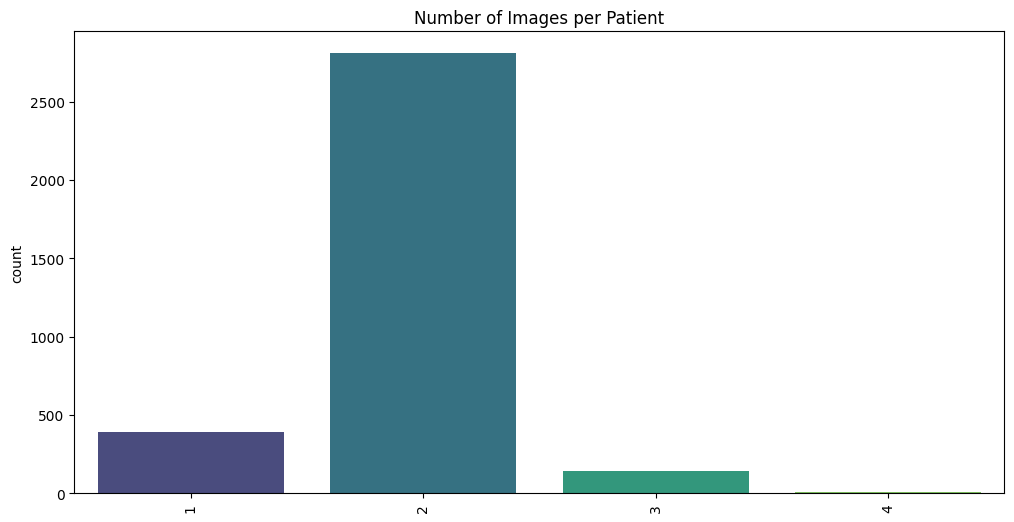

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))  
plt.title('Number of Images per Patient')
sns.countplot(x=list(images.values()), palette="viridis")  

plt.xticks(rotation=90)  
plt.show()

In [31]:
def train_test_split(data):
    persons = list(data.keys())
    persons_train = persons[:2500]
    persons_cv = persons[2500:3000]
    persons_test = persons[3000:3350]
    return persons_train, persons_cv, persons_test

images_train, images_cv, images_test = train_test_split(images)

In [32]:
def combining_images(image_set):
    
    image_per_person = defaultdict(list)  # creating a list of dictionary to store all the image paths
                                            #corresponding to a person_id
    for pid in image_set:
        for img in data['Image_path'].values:
            if pid in img:
                image_per_person[pid].append(img)
            else:
                continue
    return image_per_person

In [33]:
img_per_person_train = combining_images(images_train)
img_per_person_cv = combining_images(images_cv)
img_per_person_test = combining_images(images_test)

In [34]:
img_per_person_train['/Users/payaldabas/Downloads/NLMCXR_png/CXR1001_IM-0004']

[]

In [35]:
def load_image(file):
    img = cv2.imread(file)
    return img

In [36]:
# just checking the ID which has 4 images
for k,v in images.items():
    if v == 4:
        print(k)
        break
        

/Users/payaldabas/Downloads/NLMCXR_png/CXR846_IM-2368-0001


Text(0.5, 1.0, 'NLMCXR_png/CXR1102_IM-0069-4004.png')

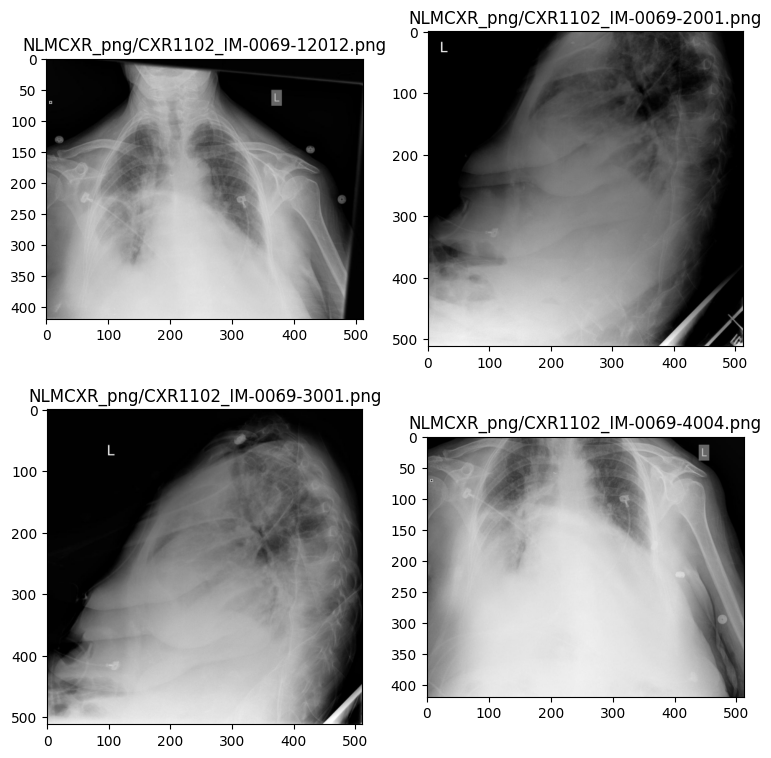

In [37]:
plt.figure(figsize=(9,9))
plt.subplot(221)
plt.imshow(load_image('/Users/payaldabas/Downloads/NLMCXR_png/CXR1102_IM-0069-12012.png'))
plt.title('NLMCXR_png/CXR1102_IM-0069-12012.png')
plt.subplot(222)
plt.imshow(load_image('/Users/payaldabas/Downloads/NLMCXR_png/CXR1102_IM-0069-2001.png'))
plt.title('NLMCXR_png/CXR1102_IM-0069-2001.png')
plt.subplot(223)
plt.imshow(load_image('/Users/payaldabas/Downloads/NLMCXR_png/CXR1102_IM-0069-3001.png'))
plt.title('NLMCXR_png/CXR1102_IM-0069-3001.png')
plt.subplot(224)
plt.imshow(load_image('/Users/payaldabas/Downloads/NLMCXR_png/CXR1102_IM-0069-4004.png'))
plt.title('NLMCXR_png/CXR1102_IM-0069-4004.png')


2 side view and 2 front view images for the same ID

Sample chest scans of a person(4 images)

Now, we have multiple chest scans to produce a single report. Some person_ids have 1, some have 2 and the highest is 4. So we can take pairs of those images as input. If it has only one image, then it can be replicated.

# Data Preperation

In [38]:
import itertools

def create_data(image_per_person):
    # new dataset
    person_id, image1, image2, report = [],[],[],[]
    for pid, imgs in image_per_person.items():   #contains pid and the images associated with that pid

        if len(imgs) == 1:
            image1.append(imgs[0])
            image2.append(imgs[0])
            person_id.append(pid)
            report.append(findings[pid])
        else:
            num = 0
            a = itertools.combinations(imgs, 2)
            for i in a:
                image1.append(i[0])
                image2.append(i[1])
                person_id.append(pid + '_' + str(num))
                report.append(findings[pid])
                num += 1
    data = pd.DataFrame()
    data['Person_id'] = person_id
    data['Image1'] = image1
    data['Image2'] = image2
    data['Report'] = report
    
    return data

In [39]:
train = create_data(img_per_person_train)
test = create_data(img_per_person_test)
cv = create_data(img_per_person_cv)

In [40]:
train.head()

,Person_id,Image1,Image2,Report
0,/Users/payaldabas/Downloads/NLMCXR_png/CXR162_...,/Users/payaldabas/Downloads/NLMCXR_png/CXR162_...,/Users/payaldabas/Downloads/NLMCXR_png/CXR162_...,Heart size normal. Lungs are clear. XXXX are n...
1,/Users/payaldabas/Downloads/NLMCXR_png/CXR1390...,/Users/payaldabas/Downloads/NLMCXR_png/CXR1390...,/Users/payaldabas/Downloads/NLMCXR_png/CXR1390...,The heart size and pulmonary vascularity appea...
2,/Users/payaldabas/Downloads/NLMCXR_png/CXR604_...,/Users/payaldabas/Downloads/NLMCXR_png/CXR604_...,/Users/payaldabas/Downloads/NLMCXR_png/CXR604_...,The heart size and pulmonary vascularity appea...
3,/Users/payaldabas/Downloads/NLMCXR_png/CXR2699...,/Users/payaldabas/Downloads/NLMCXR_png/CXR2699...,/Users/payaldabas/Downloads/NLMCXR_png/CXR2699...,The heart is normal in size and contour. The l...
4,/Users/payaldabas/Downloads/NLMCXR_png/CXR2841...,/Users/payaldabas/Downloads/NLMCXR_png/CXR2841...,/Users/payaldabas/Downloads/NLMCXR_png/CXR2841...,The heart is normal in size and contour. The l...


In [41]:
train.to_csv('train.csv')
test.to_csv('test.csv')
cv.to_csv('cv.csv')

# Preprocessing text data

In [42]:
def lowercase(text):
    '''Converts to lowercase'''
    new_text = []
    for line in text:
        new_text.append(line.lower())
    return new_text

def decontractions(text):
    '''Performs decontractions in the doc'''
    new_text = []
    for phrase in text:
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)
        phrase = re.sub(r"couldn\'t", "could not", phrase)
        phrase = re.sub(r"shouldn\'t", "should not", phrase)
        phrase = re.sub(r"wouldn\'t", "would not", phrase)
        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r"\*+", "abuse", phrase)
        new_text.append(phrase)

    return new_text

def rem_punctuations(text):
    '''Removes punctuations'''
    punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*~''' # full stop is not removed
    new_text = []
    for line in text:
        for char in line:
            if char in punctuations: 
                line = line.replace(char, "")
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def rem_numbers(text):
    '''Removes numbers and irrelevant text like xxxx*'''
    new_text = []
    for line in text:
        temp = re.sub(r'x*','',line)
        new_text.append(re.sub(r'\d','',temp))
    return new_text

def words_filter(text):
    '''Removes words less than 2 characters except no and ct'''
    new_text = []
    for line in text:
        temp = line.split()
        temp2 = []
        for word in temp:
            if  len(word) <=2 and word != 'no' and word != 'ct':
                continue
            else:
                temp2.append(word)
        new_text.append(' '.join(e for e in temp2))
    return new_text

def multiple_fullstops(text):
    ''' Removes multiple full stops from the text'''
    new_text = []
    for line in text:
        new_text.append(re.sub(r'\.\.+', '.', line))
    return new_text

def fullstops(text):
    new_text = []
    for line in text:
        new_text.append(re.sub('\.', ' .', line))
    return new_text

def multiple_spaces(text):
    new_text = []
    for line in text:
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def separting_startg_words(text):
    new_text = []
    for line in text:
        temp = []
        words = line.split()
        for i in words:
            if i.startswith('.') == False:
                temp.append(i)
            else:
                w = i.replace('.','. ')
                temp.append(w)
        new_text.append(' '.join(e for e in temp))
    return new_text

def rem_apostrophes(text):
    new_text = []
    for line in text:
        new_text.append(re.sub("'",'',line))
    return new_text

In [43]:
def text_preprocessing(text):
    '''Combines all the preprocess functions'''
    new_text = lowercase(text)
    new_text = decontractions(new_text)
    new_text = rem_punctuations(new_text)
    new_text = rem_numbers(new_text)
    new_text = words_filter(new_text)
    new_text = multiple_fullstops(new_text)
    new_text = fullstops(new_text)
    new_text = multiple_spaces(new_text)
    new_text = separting_startg_words(new_text)
    new_text = rem_apostrophes(new_text)
    return new_text

In [44]:
train['Report'] = text_preprocessing(train['Report'])
test['Report'] = text_preprocessing(test['Report'])
cv['Report'] = text_preprocessing(cv['Report'])

In [45]:
train

,Person_id,Image1,Image2,Report
0,/Users/payaldabas/Downloads/NLMCXR_png/CXR162_...,/Users/payaldabas/Downloads/NLMCXR_png/CXR162_...,/Users/payaldabas/Downloads/NLMCXR_png/CXR162_...,heart size normal . lungs are clear . are no...
1,/Users/payaldabas/Downloads/NLMCXR_png/CXR1390...,/Users/payaldabas/Downloads/NLMCXR_png/CXR1390...,/Users/payaldabas/Downloads/NLMCXR_png/CXR1390...,the heart size and pulmonary vascularity appea...
2,/Users/payaldabas/Downloads/NLMCXR_png/CXR604_...,/Users/payaldabas/Downloads/NLMCXR_png/CXR604_...,/Users/payaldabas/Downloads/NLMCXR_png/CXR604_...,the heart size and pulmonary vascularity appea...
3,/Users/payaldabas/Downloads/NLMCXR_png/CXR2699...,/Users/payaldabas/Downloads/NLMCXR_png/CXR2699...,/Users/payaldabas/Downloads/NLMCXR_png/CXR2699...,the heart normal size and contour . the lungs...
4,/Users/payaldabas/Downloads/NLMCXR_png/CXR2841...,/Users/payaldabas/Downloads/NLMCXR_png/CXR2841...,/Users/payaldabas/Downloads/NLMCXR_png/CXR2841...,the heart normal size and contour . the lungs...
...,...,...,...,...
2759,/Users/payaldabas/Downloads/NLMCXR_png/CXR19_I...,/Users/payaldabas/Downloads/NLMCXR_png/CXR19_I...,/Users/payaldabas/Downloads/NLMCXR_png/CXR19_I...,heart size normal . there tortuosity the thor...
2760,/Users/payaldabas/Downloads/NLMCXR_png/CXR1315...,/Users/payaldabas/Downloads/NLMCXR_png/CXR1315...,/Users/payaldabas/Downloads/NLMCXR_png/CXR1315...,normal heart size . normal mediastinal silhou...
2761,/Users/payaldabas/Downloads/NLMCXR_png/CXR681_...,/Users/payaldabas/Downloads/NLMCXR_png/CXR681_...,/Users/payaldabas/Downloads/NLMCXR_png/CXR681_...,heart size and pulmonary vascularity appear wi...
2762,/Users/payaldabas/Downloads/NLMCXR_png/CXR3502...,/Users/payaldabas/Downloads/NLMCXR_png/CXR3502...,/Users/payaldabas/Downloads/NLMCXR_png/CXR3502...,there has been interval performance cabg with ...


In [46]:
train.to_csv('processed_train.csv')
test.to_csv('processed_test.csv')
cv.to_csv('processed_cv.csv')

In [47]:
l = [len(e.split()) for e in train['Report'].values]  # Number of words in each report

In [48]:
print('maximum word in a report is :',max(l))

maximum word in a report is : 153


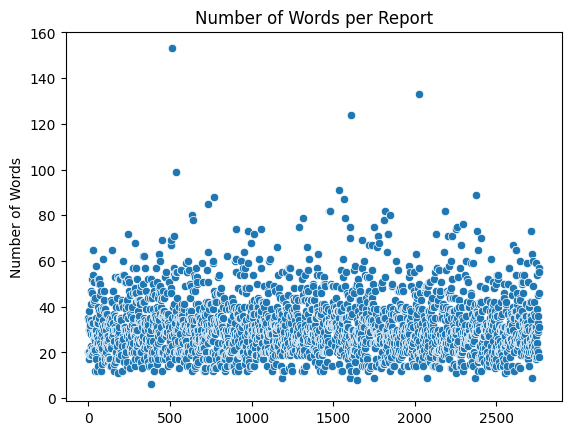

In [49]:
plt.title('Number of Words per Report')
sns.scatterplot(x=range(train.shape[0]), y=l)
plt.ylabel('Number of Words')
plt.show()


Most of the reports contain word count below 100

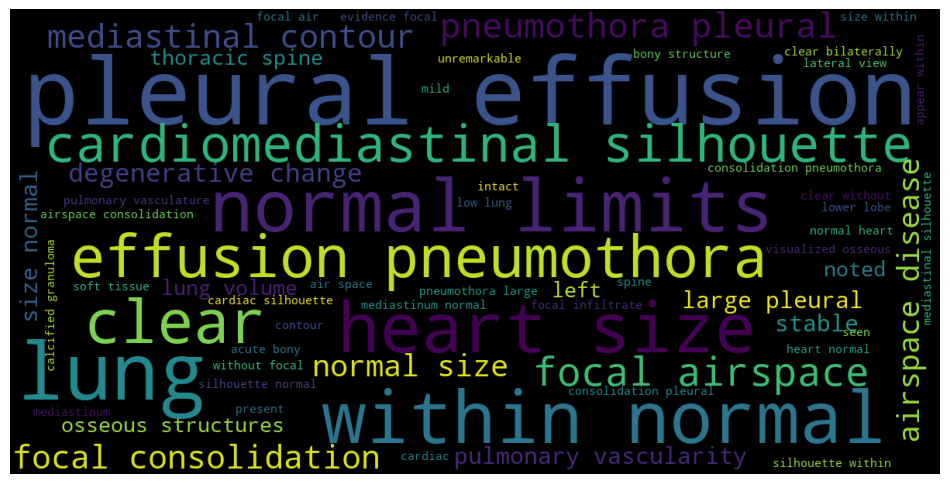

In [51]:
from wordcloud import WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',max_words=800,max_font_size=60,scale=3,random_state=1 ).generate(' '.join(data.astype(str)))

    fig = plt.figure(1, figsize=(12, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(train['Report'])

<Axes: title={'center': 'Words for each findings review'}, xlabel='Report'>

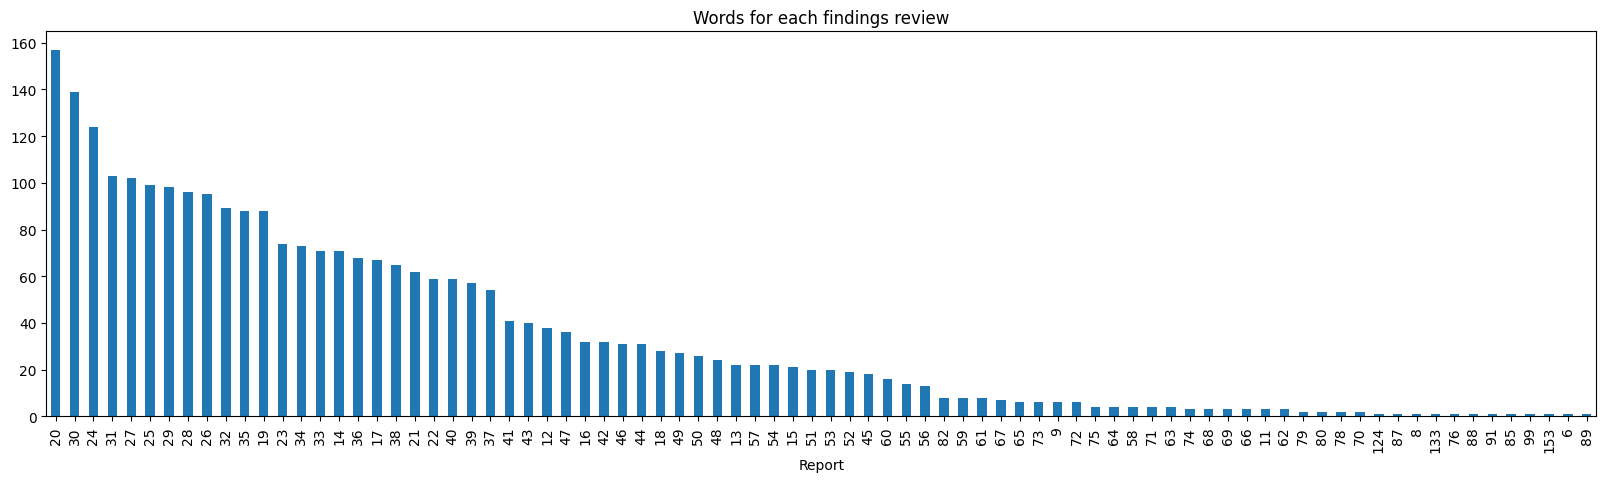

In [52]:
countword = train['Report'].str.split().apply(len).value_counts()
countword[:].plot(kind='bar',figsize=(20,5) , title = 'Words for each findings review')

In [53]:
def remodelling(x):
    '''adds start and end tokens to a sentence '''
    return 'startseq' + ' ' + x + ' ' + 'endseq'

In [54]:
train['Report'] = train['Report'].apply(lambda x : remodelling(x))
test['Report'] = test['Report'].apply(lambda x : remodelling(x))
cv['Report'] = cv['Report'].apply(lambda x : remodelling(x))

# Exporting final dataset to csv file

In [55]:
# save the cleaned data(STRUCTURED DATA)
train.to_csv('Final_Train_Data.csv', index=False)
test.to_csv('Final_Test_Data.csv', index=False)
cv.to_csv('Final_CV_Data.csv', index=False)